In [2]:
import numpy as np
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Построение доверительных интервалов

### Равномерное распределение, $\theta = 1$.

In [285]:
sample = sps.uniform.rvs(size=100)

##### Оценка с помощью $X_{(n)}$

$P(t < \frac{X_{(n)}}{\theta} < 1) = \alpha$

$P(X_{(n)} < \theta < \frac{X_{(n)}}{(1 - \alpha)^{\frac{1}{N}}}) = \alpha$

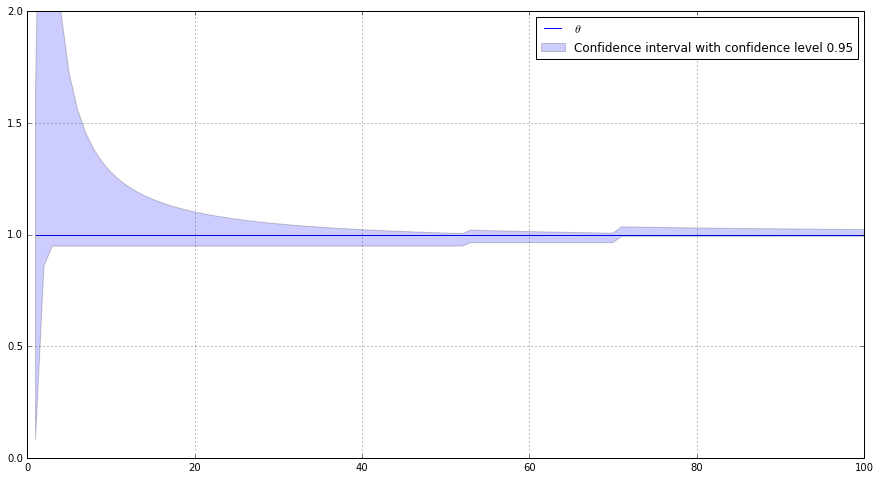

In [289]:
x = np.arange(1, 101)
y1 = np.array([sample[:i].max() for i in range(1, 101)])
y2 = np.array([sample[:i].max() / (0.05 ** (1. / i)) for i in range(1, 101)])
figure(figsize=(15, 8))
plt.fill_between(x, y1, y2, where=y2 >= y1, alpha=0.2, label='Confidence interval with confidence level 0.95')
plt.plot(x, np.zeros(x.size) + 1, label='$\\theta$')
plt.ylim(0, 2)
plt.legend()
plt.grid()

## Асимптотические доверительные интервалы

Если $\widehat{\theta}_n -$ некоторая асимптотически нормальная оценка $\theta$, то можем построить асимптотический доверительный интервал следующим образом:

$\frac{\sqrt{n}(\widehat{\theta}_n - \theta)}{\sigma(\theta)} \xrightarrow{d_{\theta}} N(0, 1)$

По лемме Слуцкого:

$\frac{\sqrt{n}(\widehat{\theta}_n - \theta)}{\sigma(\widehat{\theta}_n)} \xrightarrow{d_{\theta}} N(0, 1)$

Тогда,

$P_{\theta}(u_{\frac{1 - \alpha}{2}} < \frac{\sqrt{n}(\widehat{\theta}_n - \theta)}{\sigma(\widehat{\theta}_n)} < u_{\frac{1+\alpha}{2}}) = P_{\theta}(\widehat{\theta}_n - \frac{u_{\frac{1 + \alpha}{2}}\sigma(\widehat{\theta}_n)}{\sqrt{n}} < \theta < \widehat{\theta}_n - \frac{u_{\frac{1 - \alpha}{2}}\sigma(\widehat{\theta}_n)}{\sqrt{n}}) \xrightarrow{n\to\infty} \alpha$

In [5]:
def interval(est, sigma, i):    
    y1 = est - sps.norm.ppf((1 + 0.95) / 2) * sigma(est) / (np.arange(i, est.size + i) ** 0.5)
    y2 = est - sps.norm.ppf((1 - 0.95) / 2) * sigma(est) / (np.arange(i, est.size + i) ** 0.5)
    return y1, y2

In [6]:
def to_plt(x, y1, y2, teta):
    figure(figsize=(15, 8))
    plt.fill_between(x, y1, y2, where=y2 >= y1, alpha=0.2, label='Confidence interval with confidence level 0.95')
    plt.plot(x,np.zeros(x.size) + teta, color='red', label='\theta')
    plt.grid()

### Распределение Коши, $\theta = 1$

Выборочная квантиль уровня p - асимптотически нормальная оценка квантилии распределения уровня p. Заметим, что квантиль уровня $\frac{1}{2}$ равна $\theta$. Тогда выборочная медиана $\widehat{\mu}_n$ - асимптотически нормальная оценка $\theta$ с асимптотической дисперсией $\frac{\pi^2}{4}$. Таким образом,

$\widehat{\theta}_n = \widehat{\mu}_n$

$\sigma(\theta) = \frac{\pi}{2}$

In [7]:
sample = sps.cauchy.rvs(size=100, loc=1)

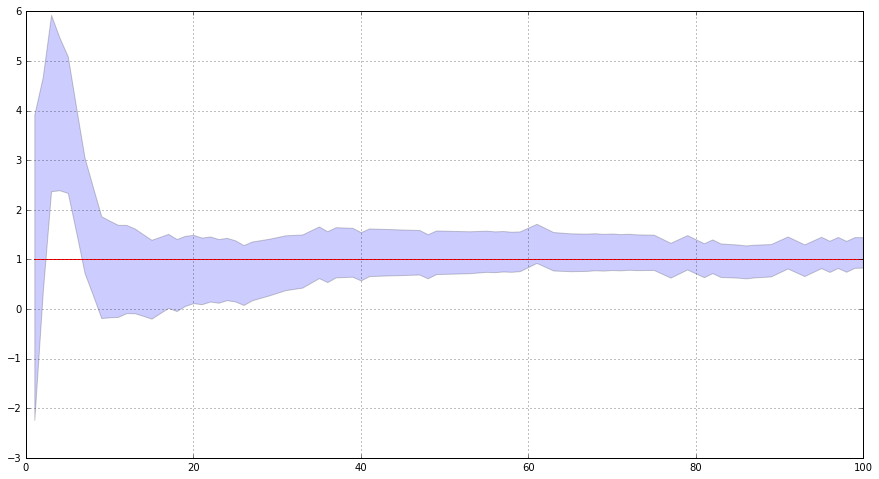

In [14]:
est = np.array([np.median(sample[:i]) for i in range(1, 101)])
def sigma(t):
    return np.pi / 2
y1, y2 = interval(est, sigma, 1)
to_plt(np.arange(1, 101), y1, y2, 1)

Оценим вероятность попадания в доверительный интервал реального знанчения $\theta$.

$n = 10$

In [36]:
th = 1
n = 10
snum = 1000
samples = sps.cauchy.rvs(size=(snum, n), loc=1)
count = 0
for i in range(snum):
    est = np.median(samples[i]) 
    def sigma(t):
        return np.pi / 2
    y1, y2 = interval(est, sigma, n)
    if (y1 <= th) and (y2 >= th):
        count += 1
print float(count)/snum

0.926


$n = 100$

In [39]:
th = 1
n = 100
snum = 1000
samples = sps.cauchy.rvs(size=(snum, n),loc=1)
count = 0
for j in range(snum):
    est = np.median(samples[j]) 
    def sigma(t):
        return np.pi / 2
    y1, y2 = interval(est, sigma, n)
    if (y1 <= th) and (y2 >= th):
        count += 1
print float(count)/snum

0.952


### Распредеделние Пуассона, $\theta = 1$

Асимптотически нормальная оценка —
$\widehat{\theta}_n(X) = \overline{X}$
с асимптотической дисперсией
$\sigma(\theta) = \sqrt{\theta}$.

In [17]:
sample = sps.poisson.rvs(mu=1, size=100)

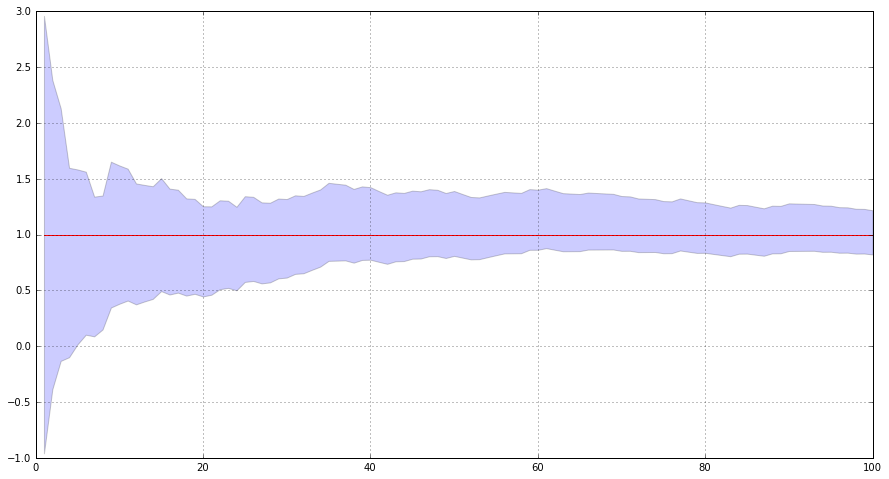

In [18]:
def sigma(t):
    return np.sqrt(t)
est = (map(float, sample.cumsum()) / (np.arange(1, 101)))
y1, y2 = interval(est, sigma, 1)
to_plt(np.arange(1, 101), y1, y2, 1)

Оценим для $n=10$ и $n=100$ вероятность попадания реального значения $\theta$  в построенный интвервал. 

In [43]:
th = 1
n = 10
snum = 1000
samples = sps.poisson.rvs(size=(snum, n), mu=1)
count = 0
for j in range(snum):
    def sigma(t):
        return np.sqrt(t)
    est = samples[j].mean()
    y1, y2 = interval(est, sigma, n)
    if (y1 <= th) and (y2 >= th):
        count += 1
print float(count)/snum

0.918


In [44]:
th = 1
n = 100
snum = 1000
samples = sps.poisson.rvs(size=(snum, n), mu=1)
count = 0
for j in range(snum):
    def sigma(t):
        return np.sqrt(t)
    est = samples[j].mean()
    y1, y2 = interval(est, sigma, n)
    if (y1 <= th) and (y2 >= th):
        count += 1
print float(count)/snum

0.952


### Гамма распределение $(10, 1)$

Из ЦПТ имеем:

$\sqrt{n}(\overline{X} - \frac{\lambda}{\theta}) \xrightarrow{d_{\theta}} N(0, \frac{\lambda}{\theta^2})$

$\sqrt{n}(\frac{\theta\overline{X} - \lambda}{\sqrt{\lambda}}) \xrightarrow{d_{\theta}} N(0, 1)$

Тогда, если $\lambda$ известна получаем следующий доверительный интервал для оценки $\theta$

$(\frac{\sqrt{\lambda}u_{\frac{1-\alpha}{2}} + \lambda\sqrt{n}}{\overline{X}\sqrt{n}}; \frac{\sqrt{\lambda}u_{\frac{1+\alpha}{2}} + \lambda\sqrt{n}}{\overline{X}\sqrt{n}})$


In [311]:
sample = sps.gamma.rvs(size=100, a=1, scale = 0.1)

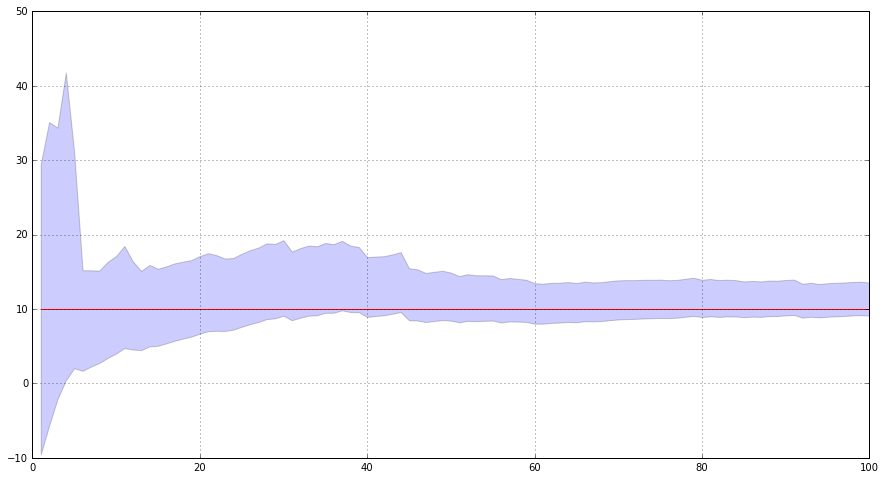

In [312]:
y1 = ((np.sqrt(np.arange(1, 101)) + sps.norm.ppf(0.05/2)) / ((sample.cumsum() / np.arange(1, 101)) * np.sqrt(np.arange(1,101))))
y2 = ((np.sqrt(np.arange(1, 101)) + sps.norm.ppf(1.95/2)) / ((sample.cumsum() / np.arange(1, 101)) * np.sqrt(np.arange(1,101))))
to_plt(np.arange(1, 101), y1, y2, 10)

Если $\lambda$ неизвестна, можем оценить её как

$\widehat{\lambda}_n = \frac{\overline{X}^2}{\overline{X^2} - \overline{X}^2}$.

Тогда, получаем следующий доверительный интервал для оценки:

$(\frac{\sqrt{\widehat{\lambda}_n}u_{\frac{1-\alpha}{2}} + \widehat{\lambda}_n\sqrt{n}}{\overline{X}\sqrt{n}}; \frac{\sqrt{\widehat{\lambda}_n}u_{\frac{1+\alpha}{2}} + \widehat{\lambda}_n\sqrt{n}}{\overline{X}\sqrt{n}})$

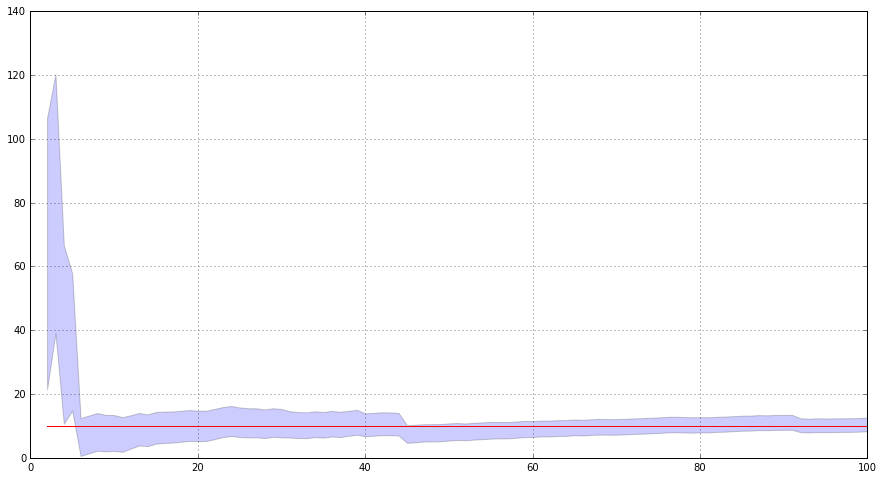

In [313]:
mean = sample.cumsum()[1:] / np.arange(2, 101)
mean2 = (sample ** 2).cumsum()[1:] / np.arange(2, 101)
lambd = (mean ** 2) / (mean2 - mean ** 2)
y1 = (np.sqrt(lambd) * sps.norm.ppf(0.025) + lambd * np.sqrt(np.arange(2, 101))) / (mean * np.sqrt(np.arange(2, 101)))
y2 = (np.sqrt(lambd) * sps.norm.ppf(1.95/2) + lambd * np.sqrt(np.arange(2, 101))) / (mean * np.sqrt(np.arange(2, 101)))
to_plt(np.arange(2, 101), y1, y2, 10)